In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
import seaborn as sns
from spellchecker import SpellChecker
from nltk.tokenize import sent_tokenize, word_tokenize
pd.options.mode.chained_assignment=None
nltk.download('punkt')

#Reading the csv file
df=pd.read_csv('D:/Sentiment Analysis/Emotions_training.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Data Preprocessing:**

**Data Preprocessing** is the process of detecting and correting the corrupt or inaccurate records from the dataset.

In [2]:
#Abbreviations for Chat Conversations
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [3]:
#Converting emojis to words
import emoji

def convert_emojis(text):
    return emoji.demojize(text)
df['text']=df['text'].apply(convert_emojis)

#Converting emoticons to the text
import emot
def convert_emoticons(text):
    for emoticon in emot.emo_unicode.EMOTICONS_EMO:
        text= text.replace(emoticon, emot.emo_unicode.EMOTICONS_EMO[emoticon])
    return text
df['text']=df['text'].apply(convert_emoticons)

#Lower Casing
df['text']=df['text'].str.lower()

#Remove Links
def remove_urls(links):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', links)
df['text']=df['text'].apply(remove_urls)

#Remove HTML Tags(if any)
def html_tags(tags):
    tag_pattern = re.compile(r'<.*?>')
    return tag_pattern.sub(r'', tags)
df['text']=df['text'].apply(html_tags)

#Remove next lines
df['text']=df['text'].replace('\n',' ',regex=True)

#Chat Words Conversion
def chat_conversion(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word
df['text']=df['text'].apply(chat_conversion)

#Removing Words containing numbers
def remove_num(text):
    return re.sub(r'\S*\d\S*','',text)
df['text']=df['text'].apply(remove_num)

#Removing Extra Spaces
def extra_spaces(text):
    return re.sub(r' +',' ',text)
df['text']=df['text'].apply(extra_spaces)

#Removing Special Characters
df['text']=df['text'].replace(r'[^A-Za-z0-9]+',' ',regex=True)

#Removing the StopWords
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['text']=df['text'].apply(lambda text: remove_stopwords(text))

#Stemming
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
def stem_words(text):
    word_tokens=text.split()
    stems=' '.join([stemmer.stem(word) for word in word_tokens])
    return stems
df['text'] =df['text'].apply(stem_words)

#Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df['text']=df['text'].apply(lambda text: lemmatize_words(text))

In [4]:
# #Spelling Correction
# spell=SpellChecker()
# def correct_spelling(text):
#     corrected_text =[]
#     for word in text.split():
#         corrected_word = spell.correction(word)
#         if corrected_word is not None:
#             corrected_text.append(corrected_word)
#         else:
#             corrected_text.append(word)
#     return ' '.join(corrected_text)
# df['text']=df['text'].apply(correct_spelling)

df.head(15)

,text,label
0,didnt feel humili,0
1,go feel hopeless damn hope around someon care ...,0
2,im grab minut post feel greedi wrong,3
3,ever feel nostalg fireplac know still properti,2
4,feel grouchi,3
5,ive feel littl burden late wasnt sure,0
6,ive take milligram time recommend amount ive f...,5
7,feel confus life teenag jade year old man,4
8,petrona year feel petrona perform well made hu...,1
9,feel romant,2


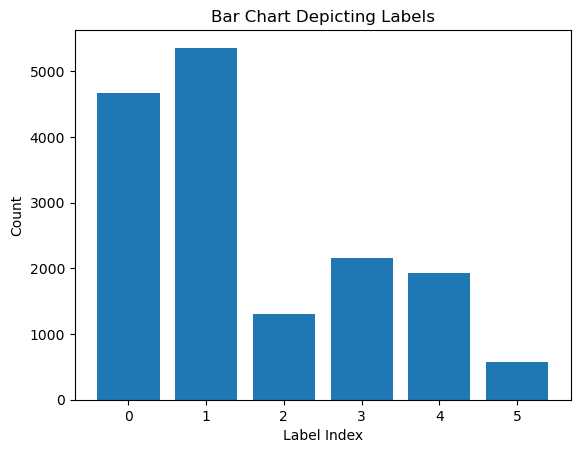

In [5]:
label_counts=df['label'].value_counts()

#Plotting a graph about the labels
import matplotlib.pyplot as plt

plt.bar(label_counts.index, label_counts.values)
plt.title('Bar Chart Depicting Labels')
plt.ylabel('Count')
plt.xlabel('Label Index')
plt.show()

As the above bar chart depicts that the data is multiclass imbalanced, therefore we need to either balance the data or use boosting algorithms for building the models as boosting algorithms work well with imbalanced data.

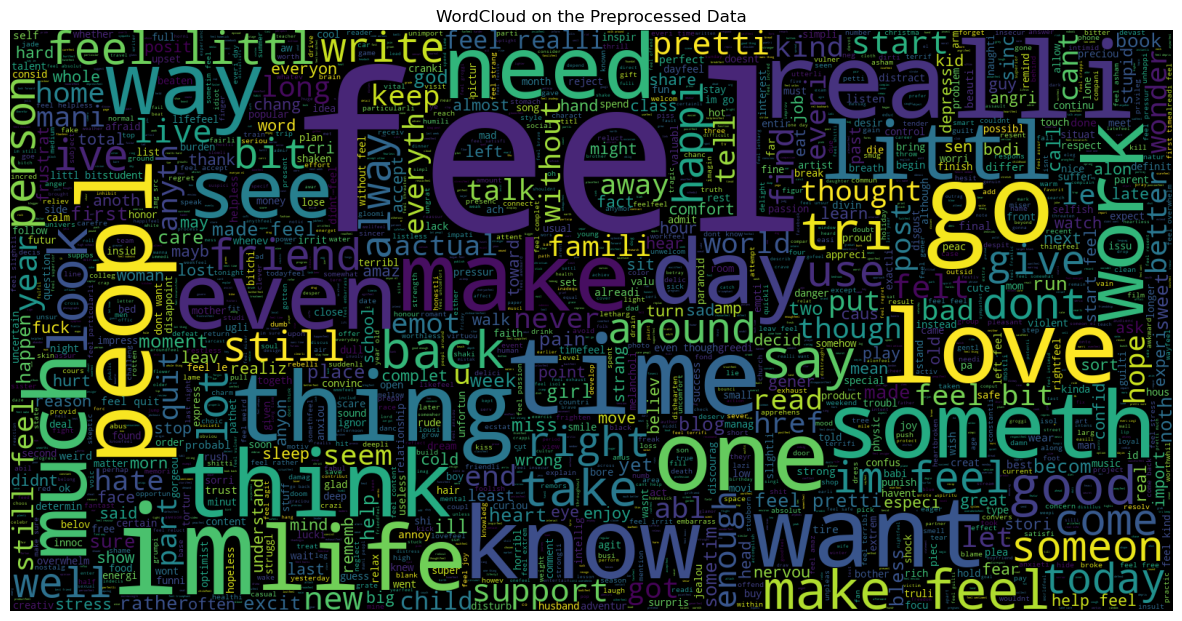

In [6]:
#Generating the Word Cloud
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="black", max_words=2000, max_font_size=300, width=1600, height=800)
wordcloud.generate(''.join(df['text'].str.lower()))

plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud on the Preprocessed Data')
plt.show()

**Separating Independent & Dependent Features**

In [7]:
x = df['text'].values
y = df['label'].values

**TFIDF Vectorization**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
x = tfidf_vectorizer.fit_transform(x)

**Train and Split Data for Model Training**

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify =y)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.6, random_state=42)

#split dataset size
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11200, 10326) (11200,)
(1920, 10326) (1920,)
(2880, 10326) (2880,)


**XGBoost Model Training and Results Evaluation**

**eXtreme Gradient Boosting** is a popular machine learning algorithm used for various tasks. The base idea behind XGBoost algorithm is to build a decision tree as a base model and then build an ensemble of these trees to improve the accuracy of predictions.

In [11]:
#Training and Testing with XGBoost Model
import xgboost as xgb
from xgboost import XGBClassifier
xgb = xgb.XGBClassifier()
xgb_params = {"n_estimators": [100, 150],        #HyperParameter Tuning
              "subsample": [0.5,0.8],
              "max_depth": [3,5],
              "learning_rate": [0.1,0.01,0.3]}
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=3, n_jobs=-1, verbose=2).fit(x_train,y_train)
xgb_cv_model.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}

In [12]:
xgb_best = XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=150, subsample=0.8).fit(x_train,y_train)
y_pred_train = xgb_best.predict(x_train)
y_pred_test = xgb_best.predict(x_test)

In [13]:
#Obtaining metrics data like accuracy, recall, f1 score, precision
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
training_data_accuracy_xgb = accuracy_score(y_pred_train,y_train)
print("Accuracy on Training Data: ", training_data_accuracy_xgb)
test_data_accuracy_xgb = accuracy_score(y_pred_test,y_test)
print("Accuracy on Test Data: ", test_data_accuracy_xgb)

training_data_f1score_xgb = f1_score(y_pred_train,y_train, average='macro')
print("F1 Score on Training Data: ", training_data_f1score_xgb)
test_data_f1score_xgb = f1_score(y_pred_test,y_test, average='macro')
print("F1 Score on Test Data: ", test_data_f1score_xgb)

training_data_precision_xgb = precision_score(y_pred_train,y_train, average='macro')
print("Precision on Training Data: ", training_data_precision_xgb)
test_data_precision_xgb = precision_score(y_pred_test,y_test, average='macro')
print("Precision on Test Data: ", test_data_precision_xgb)

training_data_recall_xgb = recall_score(y_pred_train,y_train, average='macro')
print("Recall on Training Data: ", training_data_recall_xgb)
test_data_recall_xgb = recall_score(y_pred_test,y_test, average='macro')
print("Recall on Test Data: ", test_data_recall_xgb)

Accuracy on Training Data:  0.955
Accuracy on Test Data:  0.8548611111111111
F1 Score on Training Data:  0.9515373174660319
F1 Score on Test Data:  0.8205784687860617
Precision on Training Data:  0.9536051230593611
Precision on Test Data:  0.8245616877603706
Recall on Training Data:  0.9495695747042858
Recall on Test Data:  0.8174258324866246


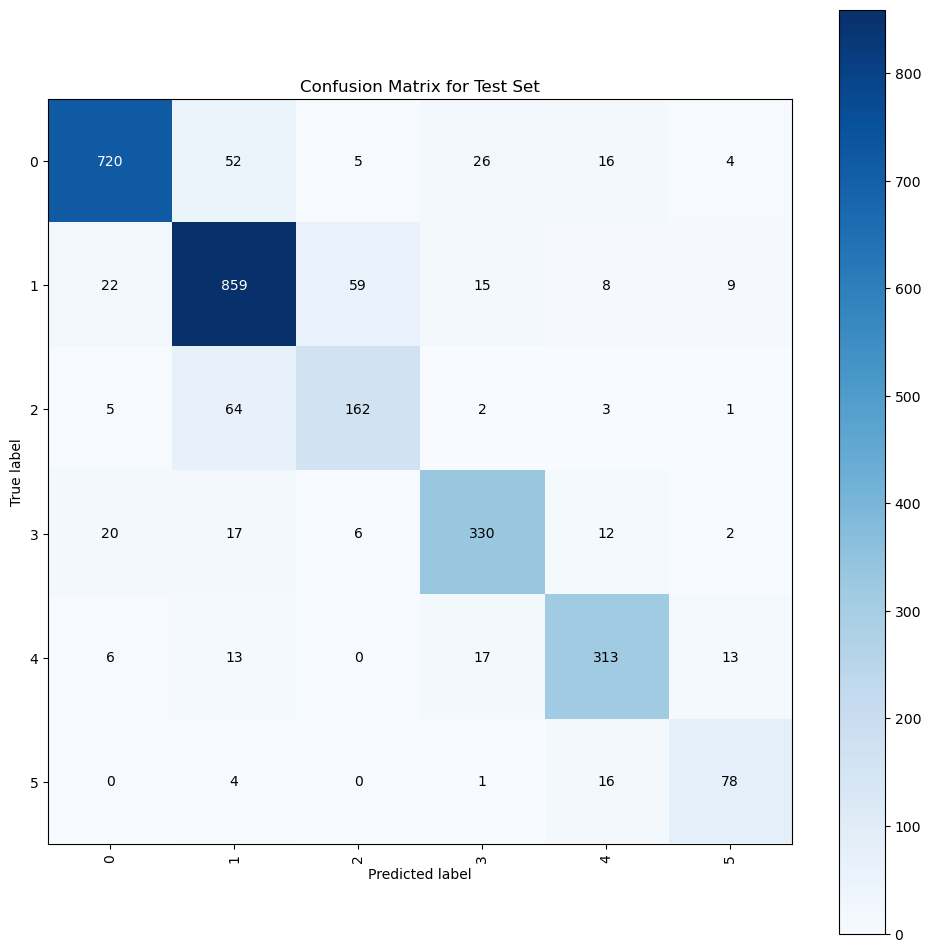

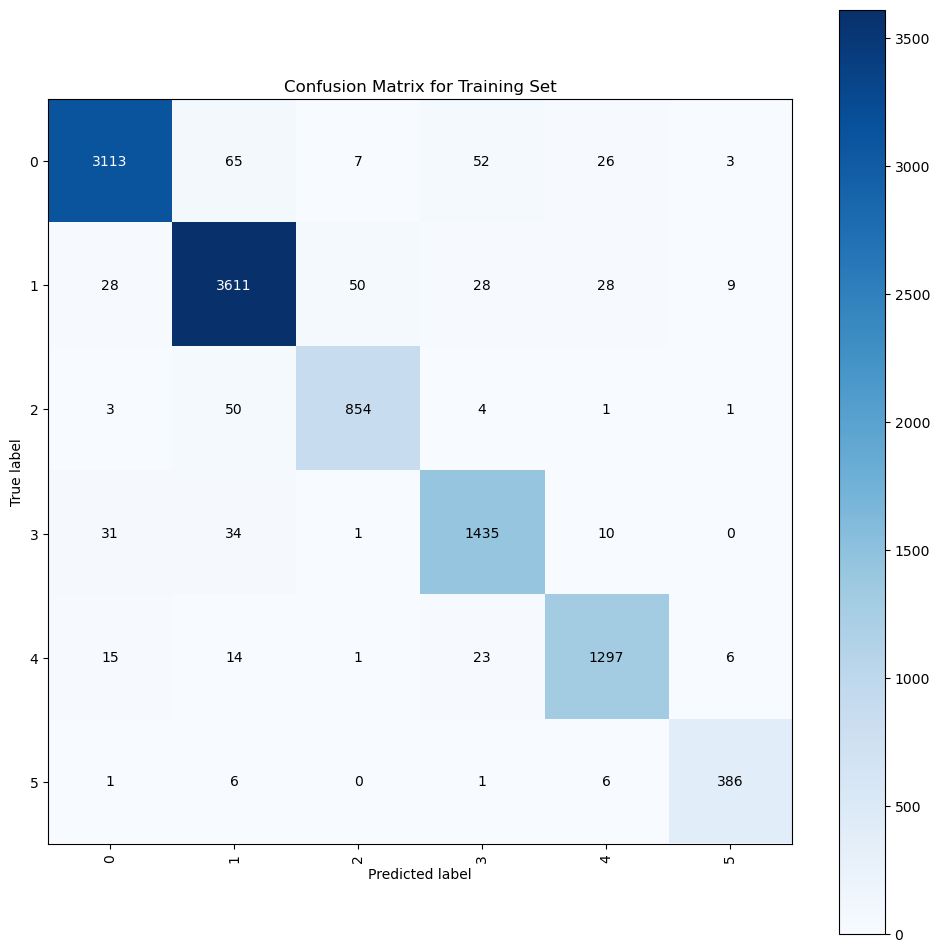

In [14]:
#Building Confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred_test,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Test Set')
plt.show()

skplt.metrics.plot_confusion_matrix(
    y_train,
    y_pred_train,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Training Set')
plt.show()

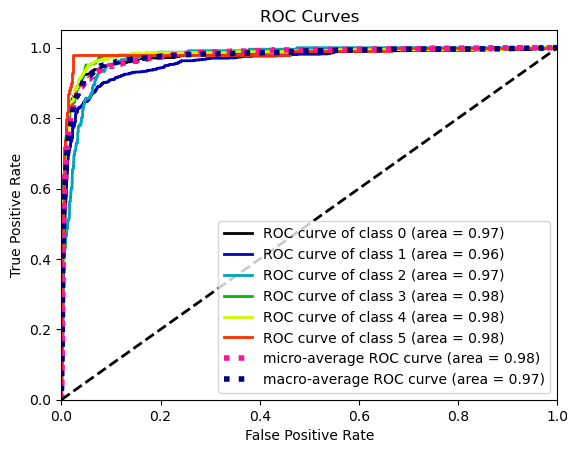

In [15]:
#Building ROC Curve for XGBoost Model
y_probas = xgb_best.predict_proba(x_test)
skplt.metrics.plot_roc(
    y_test,
    y_probas)
plt.show()

In [16]:
#Classification Report
report_xgb = classification_report(y_pred_test, y_test)
print('Classification Report:\n', report_xgb)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       773
           1       0.88      0.85      0.87      1009
           2       0.68      0.70      0.69       232
           3       0.85      0.84      0.85       391
           4       0.86      0.85      0.86       368
           5       0.79      0.73      0.76       107

    accuracy                           0.85      2880
   macro avg       0.82      0.82      0.82      2880
weighted avg       0.86      0.85      0.85      2880



**CatBoost:**

**Categorical Boosting** is a machine learning algorithm, which is based on gradient boosting framework and is designed to handle categorical data more efficiently.

In [17]:
import catboost as ctb
from catboost import CatBoostClassifier

#Create catboost classifier object
ctb = CatBoostClassifier()

#Save the best parameters in a dictionary
ctb_params = {"n_estimators": [100,150],        #HyperParameter Tuning
              "depth": [3,5],
              "learning_rate": [0.1,0.01,0.3]}

ctb_cv_model = GridSearchCV(ctb, param_grid=ctb_params, cv=3, n_jobs=-1, verbose=2).fit(x_train,y_train)
ctb_cv_model.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
0:	learn: 1.6789831	total: 880ms	remaining: 2m 11s
1:	learn: 1.6160645	total: 1.4s	remaining: 1m 43s
2:	learn: 1.5762145	total: 1.94s	remaining: 1m 34s
3:	learn: 1.5497780	total: 2.45s	remaining: 1m 29s
4:	learn: 1.5243274	total: 2.92s	remaining: 1m 24s
5:	learn: 1.4934736	total: 3.23s	remaining: 1m 17s
6:	learn: 1.4755436	total: 3.62s	remaining: 1m 13s
7:	learn: 1.4607110	total: 3.96s	remaining: 1m 10s
8:	learn: 1.4478173	total: 4.25s	remaining: 1m 6s
9:	learn: 1.4254001	total: 4.66s	remaining: 1m 5s
10:	learn: 1.4165120	total: 5.03s	remaining: 1m 3s
11:	learn: 1.3997424	total: 5.4s	remaining: 1m 2s
12:	learn: 1.3897034	total: 5.83s	remaining: 1m 1s
13:	learn: 1.3735680	total: 6.17s	remaining: 59.9s
14:	learn: 1.3628370	total: 6.5s	remaining: 58.5s
15:	learn: 1.3499857	total: 6.81s	remaining: 57s
16:	learn: 1.3424641	total: 7.1s	remaining: 55.5s
17:	learn: 1.3341643	total: 7.53s	remaining: 55.2s
18:	learn: 1.3191993	total: 7

{'depth': 5, 'learning_rate': 0.3, 'n_estimators': 150}

In [18]:
ctb_best = CatBoostClassifier(learning_rate=0.3, depth=5, n_estimators=150).fit(x_train,y_train)
y_pred_train = ctb_best.predict(x_train)
y_pred_test = ctb_best.predict(x_test)

0:	learn: 1.6789831	total: 330ms	remaining: 49.2s
1:	learn: 1.6160645	total: 640ms	remaining: 47.3s
2:	learn: 1.5762145	total: 937ms	remaining: 45.9s
3:	learn: 1.5497780	total: 1.23s	remaining: 45s
4:	learn: 1.5243274	total: 1.55s	remaining: 44.8s
5:	learn: 1.4934736	total: 1.85s	remaining: 44.4s
6:	learn: 1.4755436	total: 2.17s	remaining: 44.3s
7:	learn: 1.4607110	total: 2.5s	remaining: 44.5s
8:	learn: 1.4478173	total: 2.8s	remaining: 43.9s
9:	learn: 1.4254001	total: 3.08s	remaining: 43.1s
10:	learn: 1.4165120	total: 3.36s	remaining: 42.5s
11:	learn: 1.3997424	total: 3.66s	remaining: 42.1s
12:	learn: 1.3897034	total: 3.99s	remaining: 42.1s
13:	learn: 1.3735680	total: 4.41s	remaining: 42.8s
14:	learn: 1.3628370	total: 4.76s	remaining: 42.8s
15:	learn: 1.3499857	total: 5.05s	remaining: 42.3s
16:	learn: 1.3424641	total: 5.34s	remaining: 41.8s
17:	learn: 1.3341643	total: 5.68s	remaining: 41.6s
18:	learn: 1.3191993	total: 5.97s	remaining: 41.1s
19:	learn: 1.3084964	total: 6.24s	remaining: 

In [19]:
#Obtaining metrics data like accuracy, recall, f1 score, precision
training_data_accuracy_ctb = accuracy_score(y_pred_train,y_train)
print("Accuracy on Training Data: ", training_data_accuracy_ctb)
test_data_accuracy_ctb = accuracy_score(y_pred_test,y_test)
print("Accuracy on Test Data: ", test_data_accuracy_ctb)

training_data_f1score_ctb = f1_score(y_pred_train,y_train, average='macro')
print("F1 Score on Training Data: ", training_data_f1score_ctb)
test_data_f1score_ctb = f1_score(y_pred_test,y_test, average='macro')
print("F1 Score on Test Data: ", test_data_f1score_ctb)

training_data_precision_ctb = precision_score(y_pred_train,y_train, average='macro')
print("Precision on Training Data: ", training_data_precision_ctb)
test_data_precision_ctb = precision_score(y_pred_test,y_test, average='macro')
print("Precision on Test Data: ", test_data_precision_ctb)

training_data_recall_ctb = recall_score(y_pred_train,y_train, average='macro')
print("Recall on Training Data: ", training_data_recall_ctb)
test_data_recall_ctb = recall_score(y_pred_test,y_test, average='macro')
print("Recall on Test Data: ", test_data_recall_ctb)

Accuracy on Training Data:  0.85125
Accuracy on Test Data:  0.8204861111111111
F1 Score on Training Data:  0.8056462494125025
F1 Score on Test Data:  0.7731621595050752
Precision on Training Data:  0.7800505246719655
Precision on Test Data:  0.7479001848776509
Recall on Training Data:  0.8467617912162567
Recall on Test Data:  0.8151436094504424


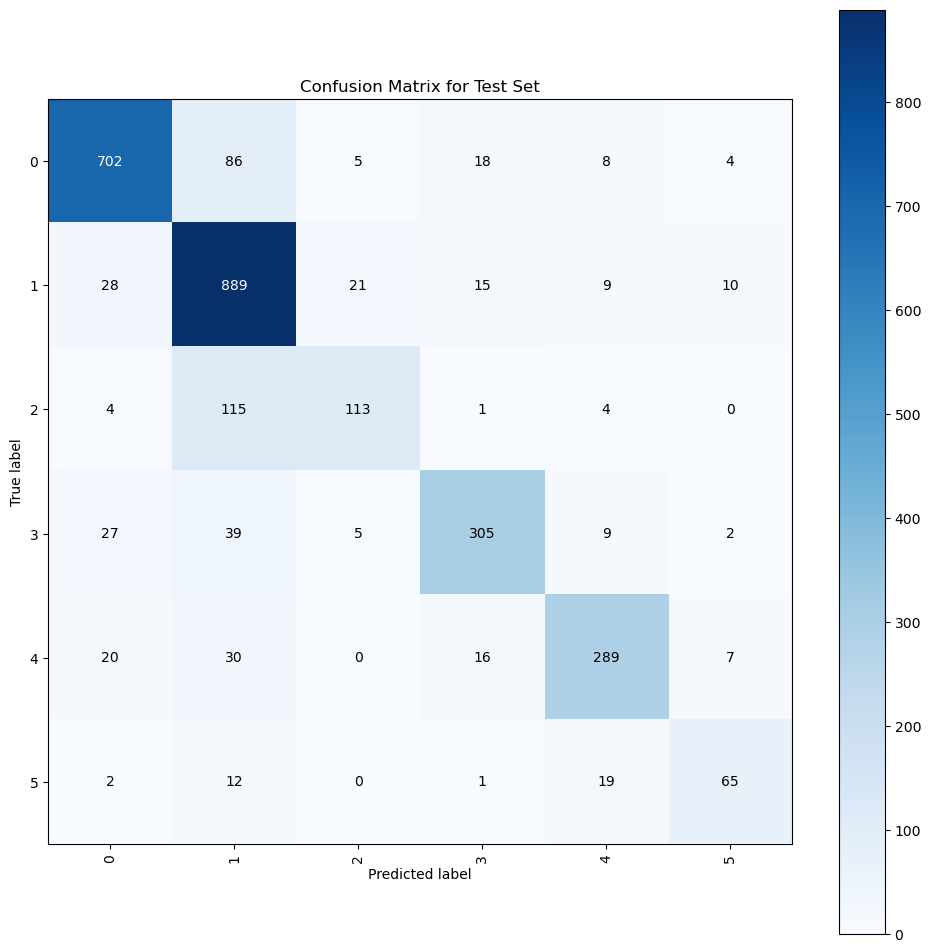

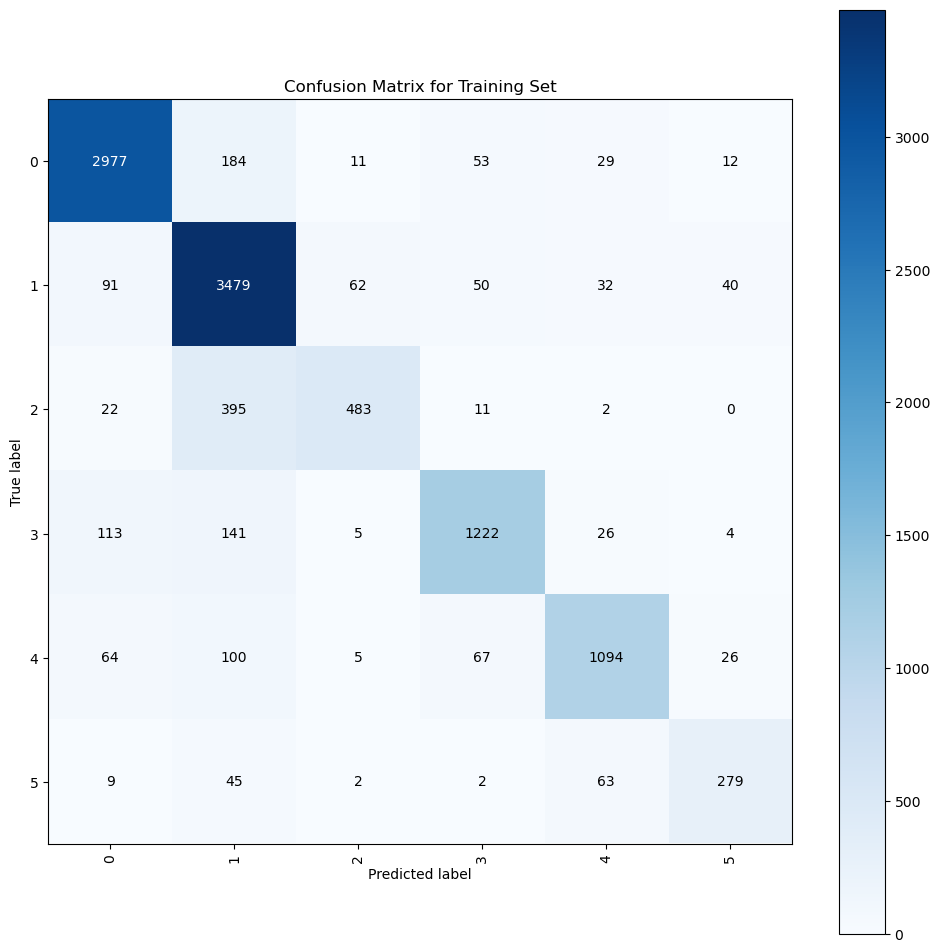

In [20]:
#Building Confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred_test,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Test Set')
plt.show()

skplt.metrics.plot_confusion_matrix(
    y_train,
    y_pred_train,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Training Set')
plt.show()

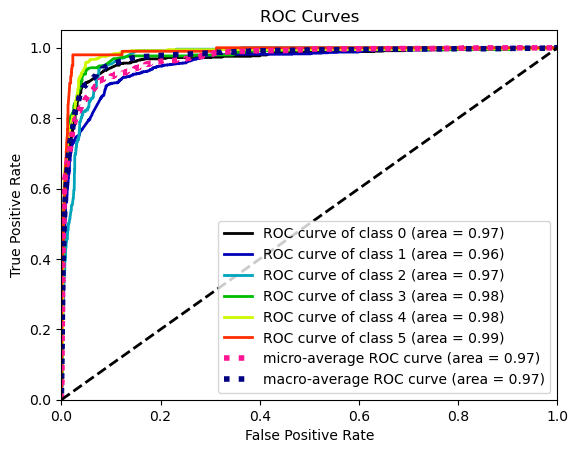

In [21]:
#Building ROC Curve for XGBoost Model
y_probas = ctb_best.predict_proba(x_test)
skplt.metrics.plot_roc(
    y_test,
    y_probas)
plt.show()

In [22]:
#Classification Report
report_ctb = classification_report(y_pred_test, y_test)
print('Classification Report:\n', report_ctb)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       783
           1       0.91      0.76      0.83      1171
           2       0.48      0.78      0.59       144
           3       0.79      0.86      0.82       356
           4       0.80      0.86      0.83       338
           5       0.66      0.74      0.70        88

    accuracy                           0.82      2880
   macro avg       0.75      0.82      0.77      2880
weighted avg       0.84      0.82      0.82      2880



**Light GBM**

In [23]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

#Create a lightgbm classifier object
lgbm = LGBMClassifier()

lgbm_params = {"n_estimators": [100,150],        #HyperParameter Tuning
              "subsample": [0.5,0.8],
                "num_leaves": [3,22],
              "max_depth": [3,5],
              "learning_rate": [0.1,0.01,0.3]}
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=3, n_jobs=-1, verbose=2).fit(x_train,y_train)
lgbm_cv_model.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23222
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 914
[LightGBM] [Info] Start training from score -1.232348
[LightGBM] [Info] Start training from score -1.093092
[LightGBM] [Info] Start training from score -2.506933
[LightGBM] [Info] Start training from score -2.003142
[LightGBM] [Info] Start training from score -2.111375
[LightGBM] [Info] Start training from score -3.332205


{'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 150,
 'num_leaves': 3,
 'subsample': 0.5}

In [24]:
lgbm_best = LGBMClassifier(learning_rate=0.3, max_depth=3, n_estimators=150, num_leaves=3, subsample=0.5, force_row_wise=True).fit(x_train,y_train)
y_pred_train = lgbm_best.predict(x_train)
y_pred_test = lgbm_best.predict(x_test)

[LightGBM] [Info] Total Bins 23222
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 914
[LightGBM] [Info] Start training from score -1.232348
[LightGBM] [Info] Start training from score -1.093092
[LightGBM] [Info] Start training from score -2.506933
[LightGBM] [Info] Start training from score -2.003142
[LightGBM] [Info] Start training from score -2.111375
[LightGBM] [Info] Start training from score -3.332205


In [25]:
#Obtaining metrics data like accuracy, recall, f1 score, precision
training_data_accuracy_lgbm = accuracy_score(y_pred_train,y_train)
print("Accuracy on Training Data: ", training_data_accuracy_lgbm)
test_data_accuracy_lgbm = accuracy_score(y_pred_test,y_test)
print("Accuracy on Test Data: ", test_data_accuracy_lgbm)

training_data_f1score_lgbm = f1_score(y_pred_train,y_train, average='macro')
print("F1 Score on Training Data: ", training_data_f1score_lgbm)
test_data_f1score_lgbm = f1_score(y_pred_test,y_test, average='macro')
print("F1 Score on Test Data: ", test_data_f1score_lgbm)

training_data_precision_lgbm = precision_score(y_pred_train,y_train, average='macro')
print("Precision on Training Data: ", training_data_precision_lgbm)
test_data_precision_lgbm = precision_score(y_pred_test,y_test, average='macro')
print("Precision on Test Data: ", test_data_precision_lgbm)

training_data_recall_lgbm = recall_score(y_pred_train,y_train, average='macro')
print("Recall on Training Data: ", training_data_recall_lgbm)
test_data_recall_lgbm = recall_score(y_pred_test,y_test, average='macro')
print("Recall on Test Data: ", test_data_recall_lgbm)

Accuracy on Training Data:  0.8741071428571429
Accuracy on Test Data:  0.8315972222222222
F1 Score on Training Data:  0.8542758684407654
F1 Score on Test Data:  0.7934200463632152
Precision on Training Data:  0.847731836256179
Precision on Test Data:  0.7872005880341444
Recall on Training Data:  0.8626996502959384
Recall on Test Data:  0.8019777368982618


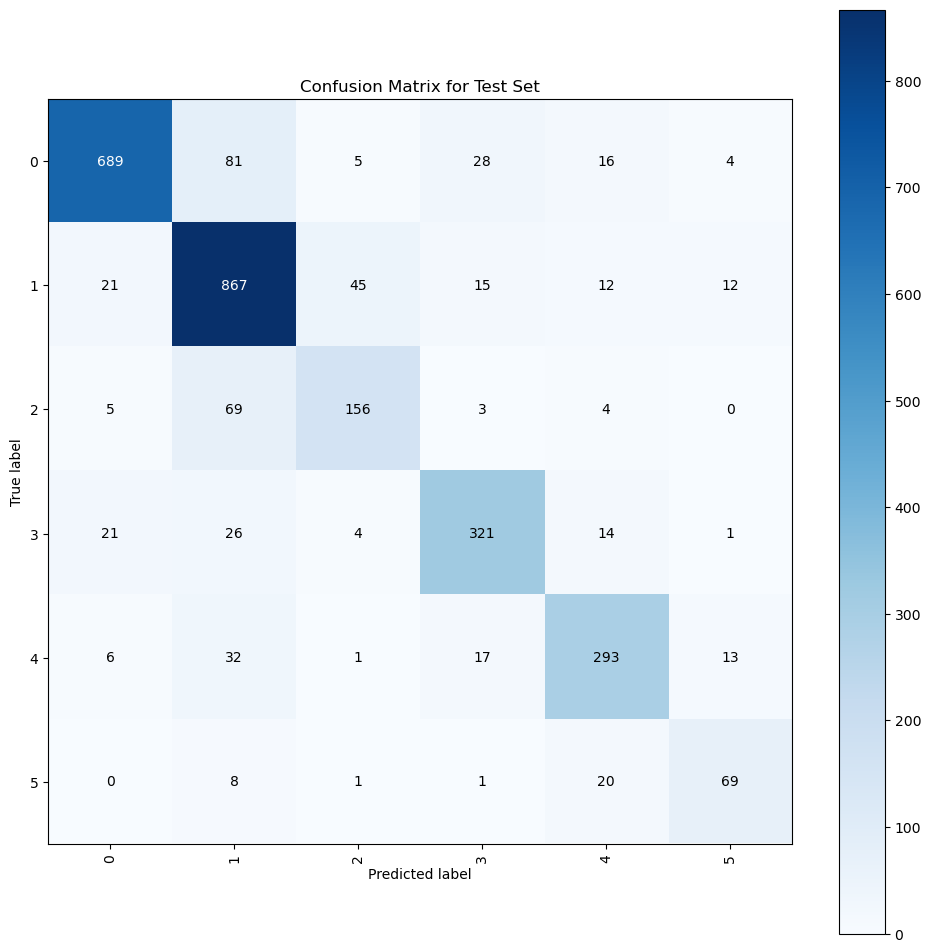

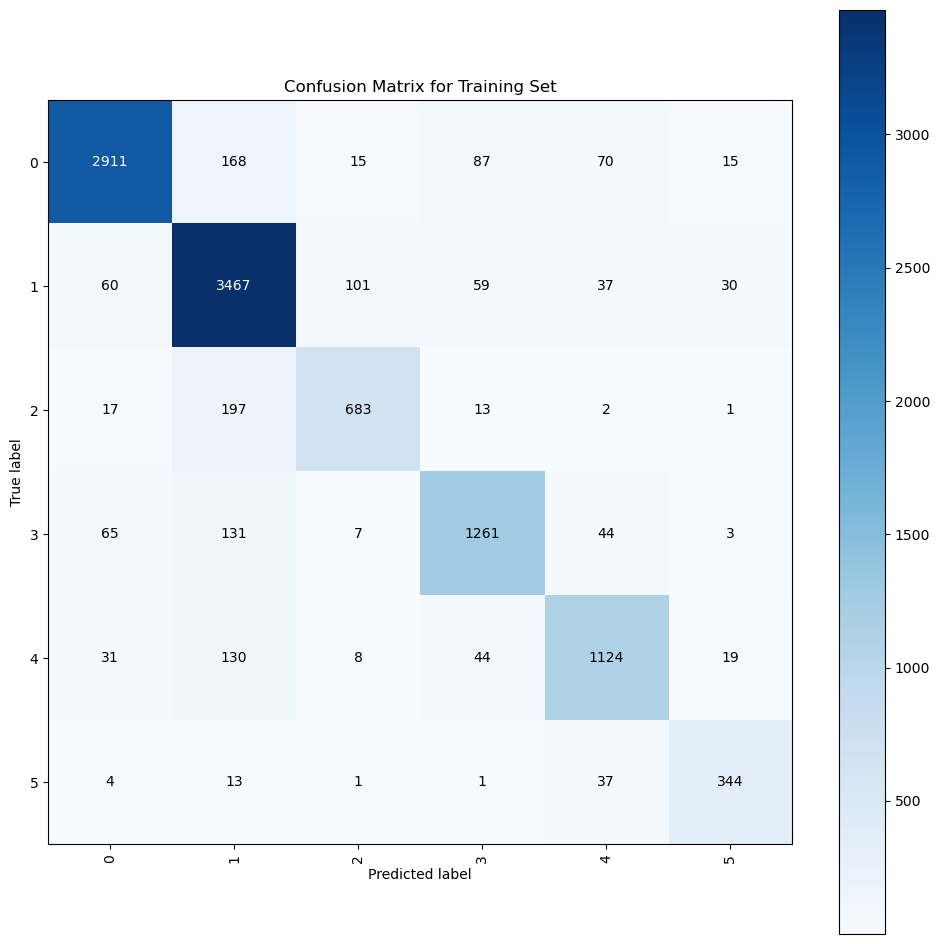

In [26]:
#Building Confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred_test,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Test Set')
plt.show()

skplt.metrics.plot_confusion_matrix(
    y_train,
    y_pred_train,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Training Set')
plt.show()

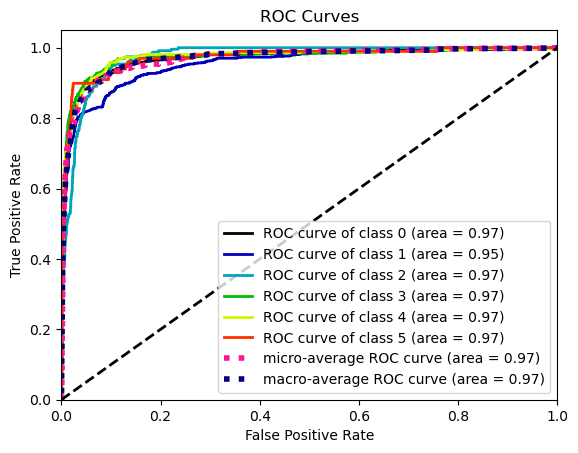

In [27]:
#Building ROC Curve for XGBoost Model
y_probas = lgbm_best.predict_proba(x_test)
skplt.metrics.plot_roc(
    y_test,
    y_probas)
plt.show()

In [28]:
#Classification Report
report_ctb = classification_report(y_pred_test, y_test)
print('Classification Report:\n', report_ctb)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       742
           1       0.89      0.80      0.84      1083
           2       0.66      0.74      0.69       212
           3       0.83      0.83      0.83       385
           4       0.81      0.82      0.81       359
           5       0.70      0.70      0.70        99

    accuracy                           0.83      2880
   macro avg       0.79      0.80      0.79      2880
weighted avg       0.84      0.83      0.83      2880



**SMOTE**

**Synthetic Minority Over-Sampling Technique** is a technique in which the minority class is oversampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbours.

In [43]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(sampling_strategy='minority')
x_smote, y_smote = smt.fit_resample(x_train,y_train)

**SVM**

**Support Vector Machine** is a machine learning approach that has a classifier and regressor. It works well on balanced dataset therefore, SMOTE function is used to balance out the imbalanced dataset.

In [48]:
from sklearn.svm import SVC
svm = SVC()
svm_params = {"max_iter": [100, 150],        #HyperParameter Tuning
              "degree": [3,5],
              "C": [0.1,1,10],
              "gamma": [0.1,0.01,0.3]}
svm_cv_model = GridSearchCV(svm, svm_params, cv=3, n_jobs=-1, verbose=2).fit(x_smote,y_smote)
svm_cv_model.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\divit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'C': 1, 'degree': 3, 'gamma': 0.3, 'max_iter': 150}

In [49]:
svm_best = SVC(gamma=0.3, max_iter=150, degree=3, C=1).fit(x_smote,y_smote)
y_pred_train = svm_best.predict(x_smote)
y_pred_test = svm_best.predict(x_test)

C:\Users\divit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [50]:
#Obtaining metrics data like accuracy, recall, f1 score, precision
training_data_accuracy_svm = accuracy_score(y_pred_train,y_smote)
print("Accuracy on Training Data: ", training_data_accuracy_svm)
test_data_accuracy_svm = accuracy_score(y_pred_test,y_test)
print("Accuracy on Test Data: ", test_data_accuracy_svm)

training_data_f1score_svm = f1_score(y_pred_train,y_smote, average='macro')
print("F1 Score on Training Data: ", training_data_f1score_svm)
test_data_f1score_svm = f1_score(y_pred_test,y_test, average='macro')
print("F1 Score on Test Data: ", test_data_f1score_svm)

training_data_precision_svm = precision_score(y_pred_train,y_smote, average='macro')
print("Precision on Training Data: ", training_data_precision_svm)
test_data_precision_svm = precision_score(y_pred_test,y_test, average='macro')
print("Precision on Test Data: ", test_data_precision_svm)

training_data_recall_svm = recall_score(y_pred_train,y_smote, average='macro')
print("Recall on Training Data: ", training_data_recall_svm)
test_data_recall_svm = recall_score(y_pred_test,y_test, average='macro')
print("Recall on Test Data: ", test_data_recall_svm)

Accuracy on Training Data:  0.8554349319774632
Accuracy on Test Data:  0.7017361111111111
F1 Score on Training Data:  0.8389958097027108
F1 Score on Test Data:  0.6900610006718774
Precision on Training Data:  0.8262984164061559
Precision on Test Data:  0.6879312777096686
Recall on Training Data:  0.8555502689579777
Recall on Test Data:  0.6959867039785795


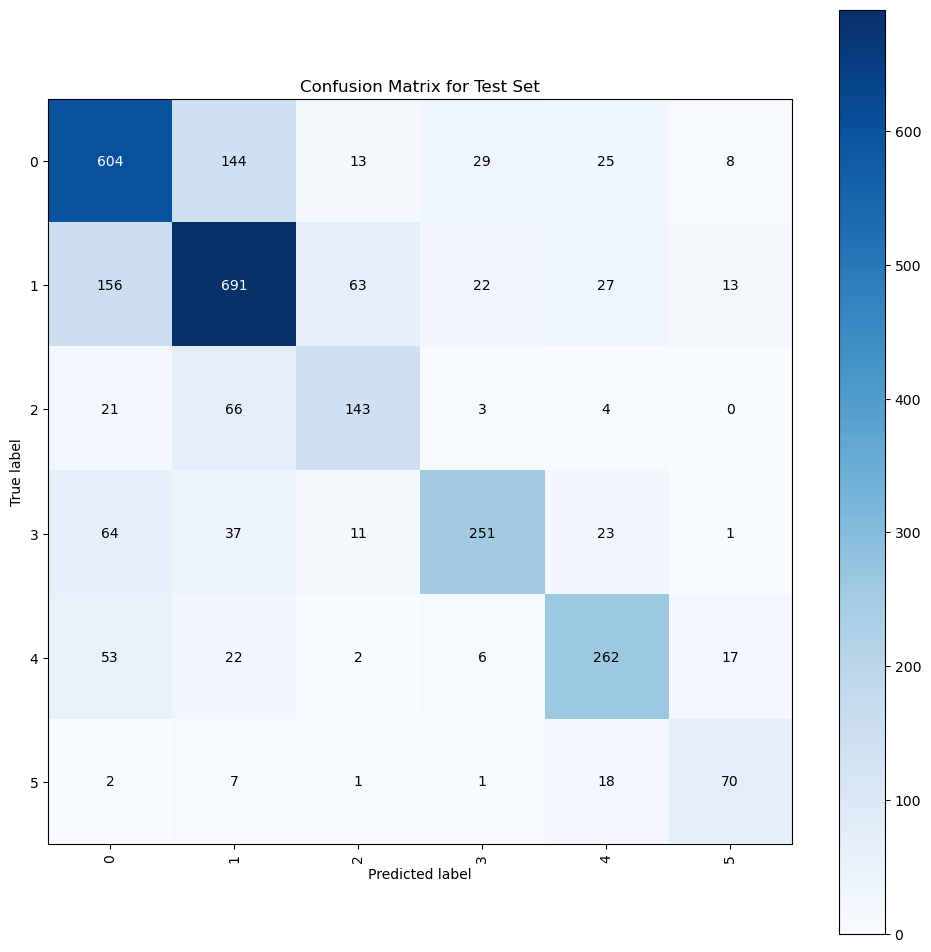

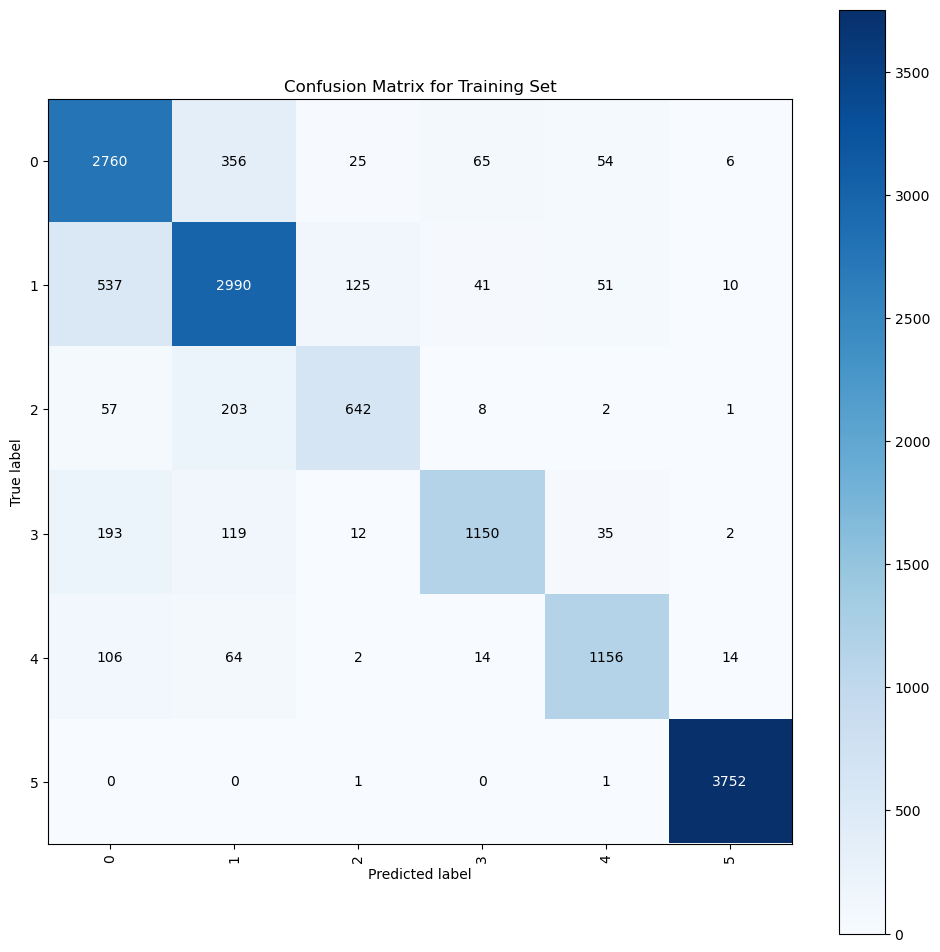

In [51]:
#Building Confusion matrix
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred_test,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Test Set')
plt.show()

skplt.metrics.plot_confusion_matrix(
    y_smote,
    y_pred_train,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Training Set')
plt.show()

In [53]:
#Classification Report
report_svm = classification_report(y_pred_test, y_test)
print('Classification Report:\n', report_svm)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.67      0.70       900
           1       0.71      0.71      0.71       967
           2       0.60      0.61      0.61       233
           3       0.65      0.80      0.72       312
           4       0.72      0.73      0.73       359
           5       0.71      0.64      0.67       109

    accuracy                           0.70      2880
   macro avg       0.69      0.70      0.69      2880
weighted avg       0.70      0.70      0.70      2880

